In [13]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
from scipy.special import factorial

img = cv.imread('./img/lena.jpg', cv.IMREAD_GRAYSCALE)

# Bildrauschen
## Gaußsches Rauschen

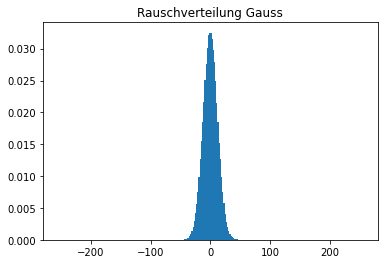

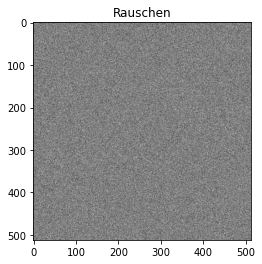

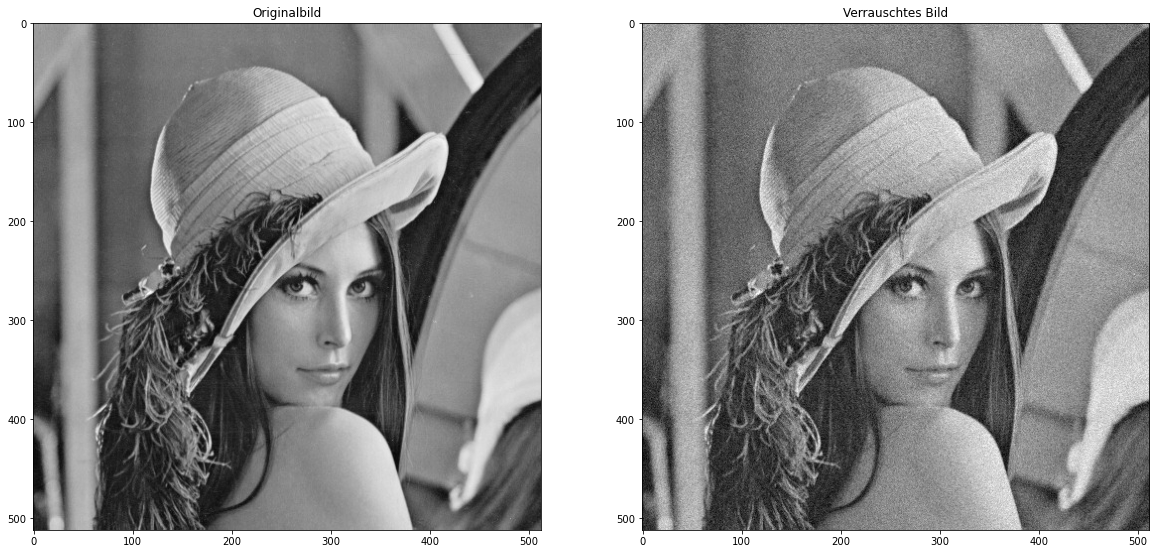

In [18]:
# die Berechnung der Rausch-Überlagerung ist folgender Quelle entnommen:
# https://stackoverflow.com/questions/22937589/how-to-add-noise-gaussian-salt-and-pepper-etc-to-image-in-python-with-opencv

# Gaussches Rauschen
# img:  Bild
# mean: Mittelwert der Gauß-Verteilung
# var:  Varianz der Gauß-Verteilung
# debug:falls True, so werden Rauschverteilung und Rauschbild ausgegeben
def add_gauss(img, mean = 0, var = 0.1, debug = False):
    row,col = img.shape    
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col))
    gauss = gauss.reshape(row,col)
    
    noisy = np.clip(img + gauss, 0, 255)
    
    if(debug):
        plt.figure()
        plt.hist(gauss.ravel(),256,[-255,255], density=True)
        plt.title('Rauschverteilung Gauss')
        plt.show()
        plt.title('Rauschen')
        plt.imshow(gauss, cmap='gray', vmin=-50, vmax=50)
        plt.show()                
    
    return noisy
    
dst = add_gauss(img, mean = 0, var = 150, debug=True)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Originalbild')
plt.subplot(1,2,2)
plt.imshow(dst, cmap='gray')
plt.title('Verrauschtes Bild')
plt.show()

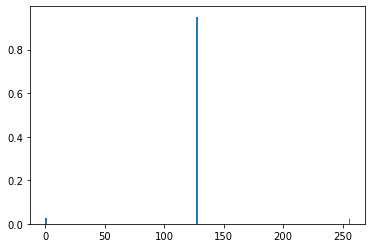

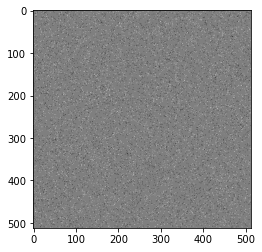

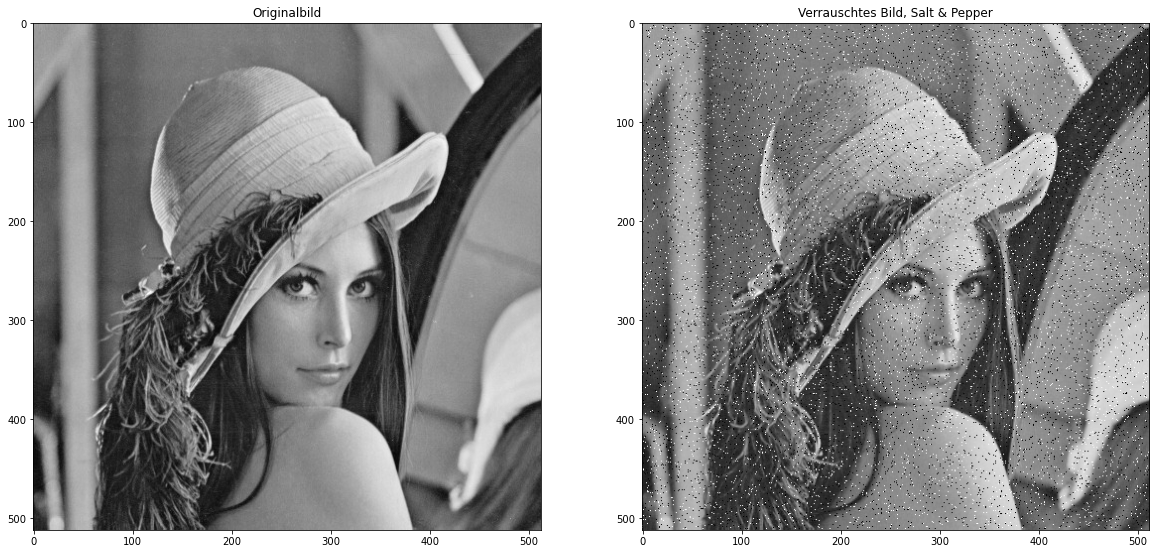

In [3]:
# Salt-and-Pepper-Rauschen
# img:    Bild
# s_vs_p: Verhältnis von Salz  (weiße Störungen) und Pfeffer (schwarze Störungen)
# amount: Anteil der gestörten Pixel am Gesamtbild
# debug:  falls True, so werden Rauschverteilung und Rauschbild ausgegeben
def add_salt_pepper(img, s_vs_p = 0.5, amount = 0.05, debug=False):
    row,col = img.shape    
    out = np.copy(img)
    noise = np.full(img.shape, 127)
    
    # Salt mode
    num_salt = np.ceil(amount * img.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt))
        for i in img.shape]
    out[tuple(coords)] = 255  
    noise[tuple(coords)] = 255

    # Pepper mode
    num_pepper = np.ceil(amount* img.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in img.shape]    
    out[tuple(coords)] = 0
    noise[tuple(coords)] = 0
    
    if(debug):
        plt.hist(noise.ravel(),256,[0,256], density=True)
        plt.show()
        plt.imshow(noise, cmap='gray')
        plt.show()   
        
    return out
    
dst = add_salt_pepper(img, debug=True)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Originalbild')
plt.subplot(1,2,2)
plt.imshow(dst, cmap='gray')
plt.title('Verrauschtes Bild, Salt & Pepper')
plt.show()

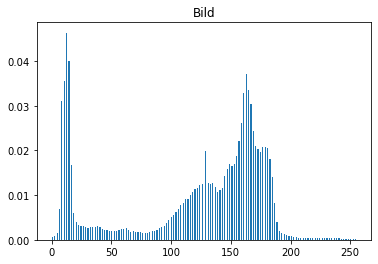

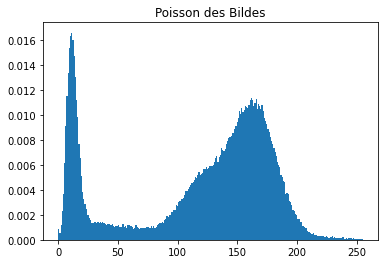

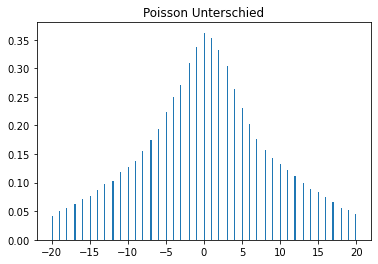

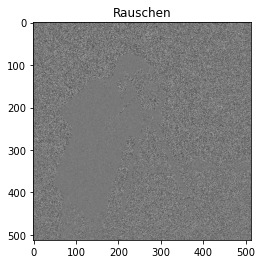

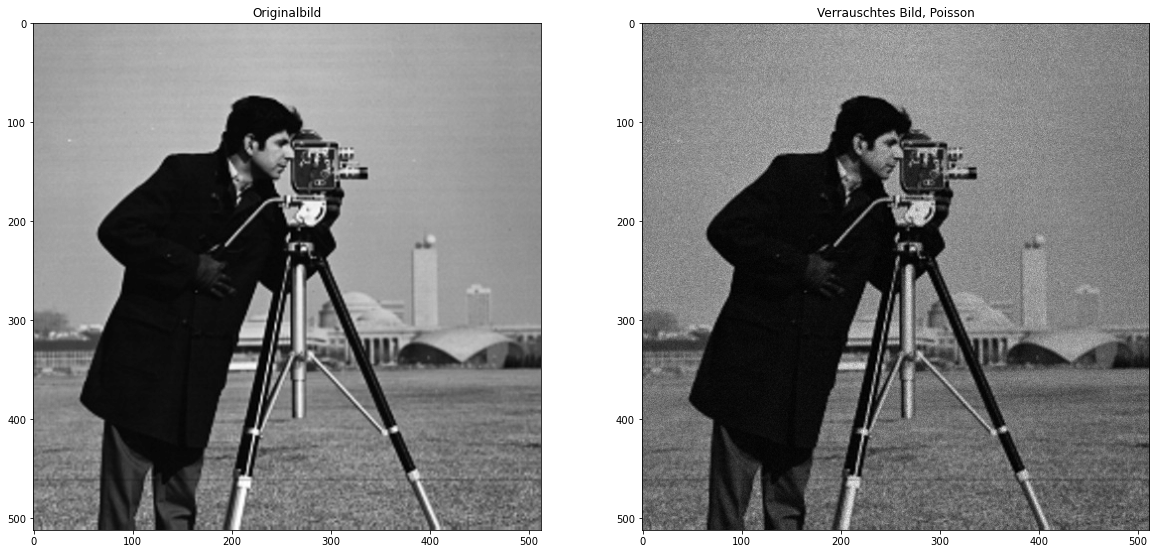

In [53]:
# Poisson-Rauschen
# img:    Bild
# debug:  falls True, so werden Rauschverteilung und Rauschbild ausgegeben
def add_poisson(img, debug=False):
    row,col = img.shape   
    vals = len(np.unique(img))
    vals = 2 ** np.ceil(np.log2(vals))
    noisy = np.clip(np.random.poisson(img * vals) / float(vals), 0, 255)
    poisson = np.random.poisson(img, (row, col))     
    
    if(debug):
        plt.figure()
        plt.hist(img.ravel(), 256, [0,255], density=True)
        plt.title('Bild')
        plt.show()
        plt.figure()
        plt.hist(poisson.ravel(),256,[0,255], density=True)
        plt.title('Poisson des Bildes')
        plt.show()
        plt.figure()
        plt.hist(img.ravel()-poisson.ravel(),256,[-20,20], density=True)
        plt.title('Poisson Unterschied')
        plt.show()        
        
    return poisson

debug = True
dst = add_poisson(img, debug)

if debug:
    diff = dst - img
    plt.imshow(diff, cmap='gray')
    plt.title('Rauschen')
    plt.show()

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Originalbild')
plt.subplot(1,2,2)
plt.imshow(dst, cmap='gray')
plt.title('Verrauschtes Bild, Poisson')
plt.show()

## Aufgabe: Rauschunterdrückung (Gauss)

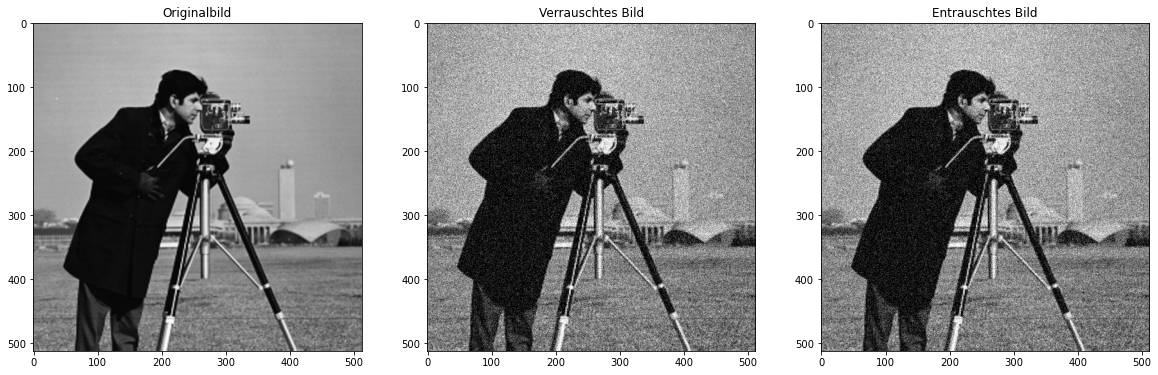

In [54]:
img = cv.imread('./img/cameraman.bmp', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Originalbild')

# addiere Gaußsches Rauschen
img_noisy = add_gauss(img, 0, 1000)

plt.subplot(1,3,2)
plt.title('Verrauschtes Bild')
plt.imshow(img_noisy, cmap='gray')

# ToDo: Entfernen Sie das Gaußsche Rauschen (Experimentieren Sie mit den verschiedenen Faltungsfiltern)
plt.subplot(1,3,3)
plt.title('Entrauschtes Bild')
# ToDo: Hier Ihr Bild eintragen
plt.imshow(img_noisy, cmap='gray')
plt.show()

## Aufgabe: Rauschunterdrückung (Salt-and-Pepper)

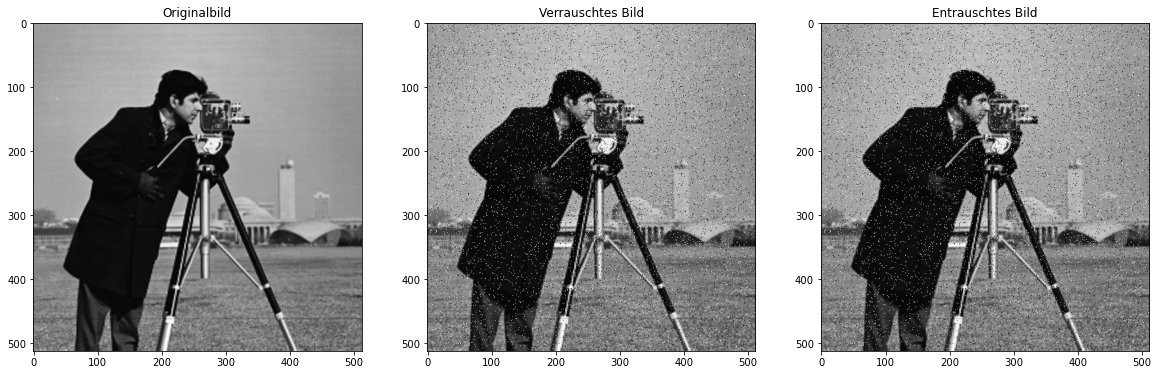

In [56]:
img = cv.imread('./img/cameraman.bmp', cv.IMREAD_GRAYSCALE)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Originalbild')

# addiere Salt-and-Pepper-Rauschen
img_noisy = add_salt_pepper(img, amount=0.05)

plt.subplot(1,3,2)
plt.title('Verrauschtes Bild')
plt.imshow(img_noisy, cmap='gray')

# ToDo: Entfernen Sie das Salt-and-Pepper Rauschen (Experimentieren Sie mit den verschiedenen Faltungsfiltern)

plt.subplot(1,3,3)
plt.title('Entrauschtes Bild')
# ToDo: Hier Ihr Bild eintragen
plt.imshow(img_noisy, cmap='gray')
plt.show()

## Probability Distribution Functions

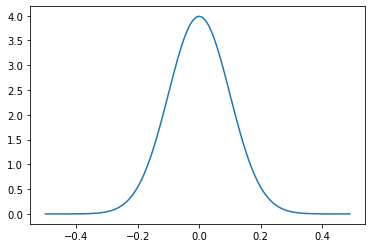

In [7]:
# Gauss
std_dev = 0.1
mean = 0
x = np.arange(-0.5,0.5,0.01)
p_gauss = 1/(np.sqrt(2*np.pi)*std_dev) * np.exp(-0.5*((x-mean)/std_dev)**2)
plt.plot(x, p_gauss)
plt.xlim = (-1,1)

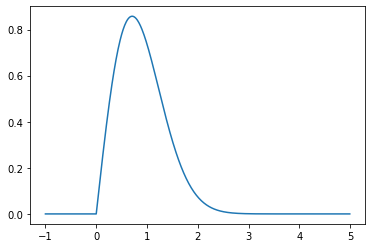

In [8]:
# Rayleigh
a = 0
b = 1
x = np.arange(-1,5, 0.01)
p_rayleigh = 2/b**2 * (x-a) * np.exp(-(x-a)**2/b**2)
p_rayleigh[p_rayleigh < 0] = 0
plt.plot(x, p_rayleigh)
plt.xlim = (-1,1)

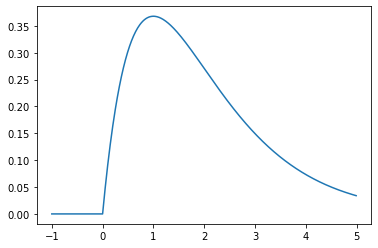

In [9]:
# Gamma
a = 1
b = 2
x = np.arange(-1,5, 0.01)
p_gamma = (a**b * x**(b-1)) / (np.math.factorial(b-1))*np.exp(-a*x)
2/b**2 * (x-a) * np.exp(-(x-a)**2/b**2)
p_gamma[p_gamma < 0] = 0
plt.plot(x, p_gamma)
plt.xlim = (-1,1)

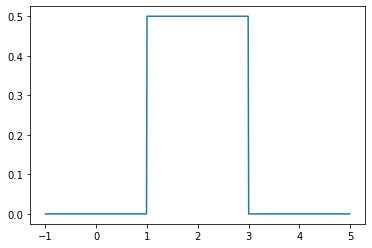

In [38]:
# Uniform
a = 1
b = 3
x = np.arange(-1,5, 0.01)
p_uniform = np.full(x.shape, 1/(b-a))
p_uniform[x < a] = 0
p_uniform[x > b] = 0
plt.plot(x, p_uniform)
plt.xlim = (-1,1)

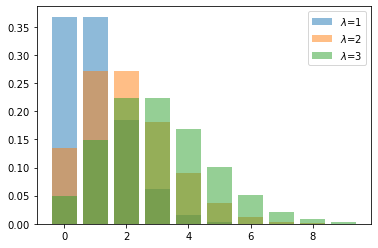

In [73]:
# Poisson
x = np.arange(0,10,1)
lam = 1
p_poisson_1 = lam**x / factorial(x) * np.exp(-lam)
plt.bar(x, p_poisson_1, label='$\lambda$=1', alpha=0.5)
lam = 2
p_poisson_2 = lam**x / factorial(x) * np.exp(-lam)
plt.bar(x, p_poisson_2, label='$\lambda$=2', alpha=0.5)
lam = 3
p_poisson_3 = lam**x / factorial(x) * np.exp(-lam)
plt.bar(x, p_poisson_3, label='$\lambda$=3', alpha=0.5)
plt.legend()
plt.show()